<H1>1. Introduction</H1>
RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early morning of 15 April 1912, after colliding with an iceberg during her maiden voyage from Southampton to New York City. Of the 2,224 passengers and crew aboard, more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history. 

<H3>1.1 About the Data Set</H3>
Contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. The data was extracted from Kaggle website https://www.kaggle.com/c/titanic/data

<H1>2. Data Analysis</H2>
<H3>2.1 Questions</H3>
In my analysis I will look for answers to the following questions: 
<ul>
<li>What relevance does Gender have in increasing chance of surviving?</li>
<li>What relevance does Age have in increasing chance of surviving?</li>
<li>What relevance does Fare Price have in increasing chance of surviving?</li>
<li>What relevance does Passenger class have in increasing chance of surviving?</li>
</ul>

<h3>2.2 Investigate and Prepare Data</h3>

<h4>2.2.1 Import Data Set and Check contents in a Data Frame</h4>

In [245]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

In [246]:
titanic_df = pd.read_csv('titanic_data.csv')

In [247]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<H4>2.2.2 Identify Data Types, Missing Values and Duplicate Values</H4>
From the results of running titanic_df.info() below, it can be seen that the following columns are missing values:
<lu>
<li>Age - 20% is missing</li>
<li>Cabin - 77% is missing</li>
<li>Embarked - 0.3% is missing </li>

And from runnning str(titanic_df.Name.nunique()) all 891 passenger records are unique. So there are no duplicates. 
</lu>

In [248]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [249]:
#Check that there are no duplicates of passenger
print 'Number of Unique Passengers in data set: '+ str(titanic_df.Name.nunique())

Number of Unique Passengers in data set: 891


<H4>2.2.2 Remove unwanted columns</H4>
<p>I have removed the following columns as they will not be used in this anlaysis:</p>
<li>Cabin</li>
<li>Ticket</li>
<li>SibSp</li>
<li>Parch</li>
<li>PassengerId</li>


In [250]:
titanic_df = titanic_df[['PassengerId','Name','Survived','Pclass','Sex','Age','Fare','Embarked']]

<H4>2.2.4 Handling of missing values</h4>
<p>Of the columns missing data Age is what we what we care about missing as we want to use it for our analysis </p>

<b>Option 1:</b> 
<p>I could substitute all NA "Age" values with the median; which is safer to use than the mean as the mean can be skewed by large and small value outliers. However, by subsitituting empty age values with the median we will be artifically affecting the distribution (see the the before and after histogram below).</p>

<p><b>Option 2:</b> </p>
<p>Ignore  passengers that are missing an Age value.</p>

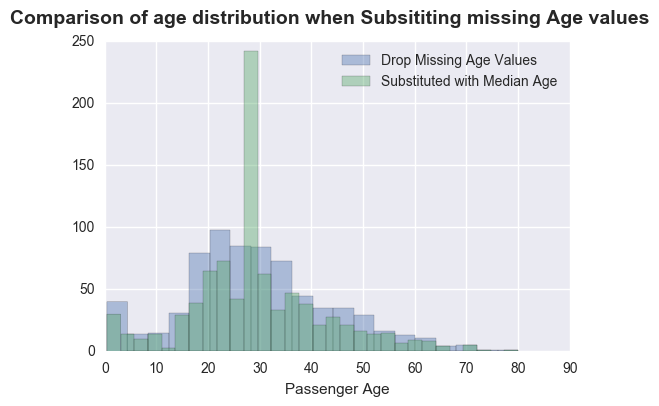

In [253]:
# Create a comparison plot to show the different output when using Option 1 and OPtion 2
plt.suptitle('Comparison of age distribution when Subsititing missing Age values', fontsize=14, fontweight='bold')


titanic_skew_df2 = pd.read_csv('titanic_data.csv')
sns.distplot(titanic_skew_df2.Age.dropna(), kde=False, label='Drop Missing Age Values')
sns.distplot(titanic_skew_df2['Age'].fillna(titanic_skew_df2['Age'].median()), kde=False, label='Substituted with Median Age')

plt.xlabel("Passenger Age")
#plt.ylabel("Passenger Vol.")

plt.legend()

<b>Choice with regards to handling of missing Age Values:</b>
<p>I have gone with OPTION 2 to remove records where Age is Null; for the reason that if I went with OPTION 1 to substitute Null age with Median Age, I would not be able to reasonably infer things about the Age variable and its relationships with other variables; and as I am not going to feed this data into a discrimination model for statistical analysis there is more risk of corrupting my results by going with OPTION 1 </p>

<h1>2.3 Answering Questions</h2>

<h3>2.3.1 Do women have a greater chance of surviving than men?</H3>

In [254]:
survived_sex = titanic_df[titanic_df['Survived']==1]['Sex'].value_counts()
dead_sex = titanic_df[titanic_df['Survived']==0]['Sex'].value_counts()

In [255]:
# Record the results in a DataFrame
gender_df = pd.DataFrame([survived_sex,dead_sex],index = ['Survived','Dead'])

In [256]:
# Present measure output
gender_df.head()

,female,male
Survived,233,109
Dead,81,468


<H4>Survival Rate Based on Gender and Age</h4>

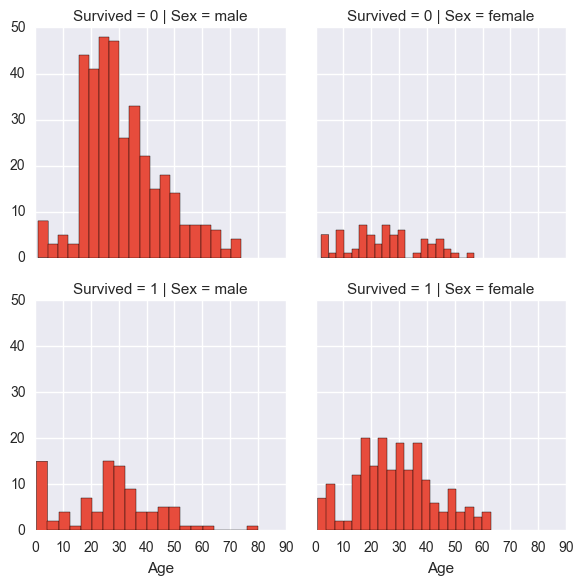

In [304]:
#bins = np.arange(0, 20, 100)
g = sns.FacetGrid(titanic_df, col="Sex",  row="Survived")
g = g.map(plt.hist, "Age", color="#e74c3c", bins = 20)

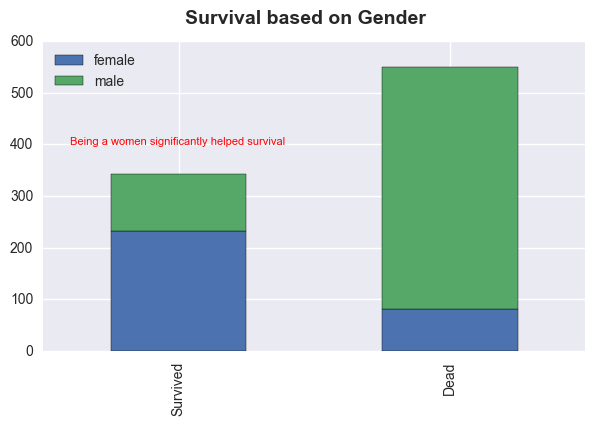

In [306]:
gender_df.plot(kind='bar',stacked=True, figsize=(7,4))
#plt.ylabel('Number of passengers')
plt.suptitle('Survival based on Gender', fontsize=14, fontweight='bold')
plt.text(-.4, 400,'Being a women significantly helped survival', fontsize=8, color='red')

<H4>Create Bar Chart of Survival Mean Based on Gender</h4>

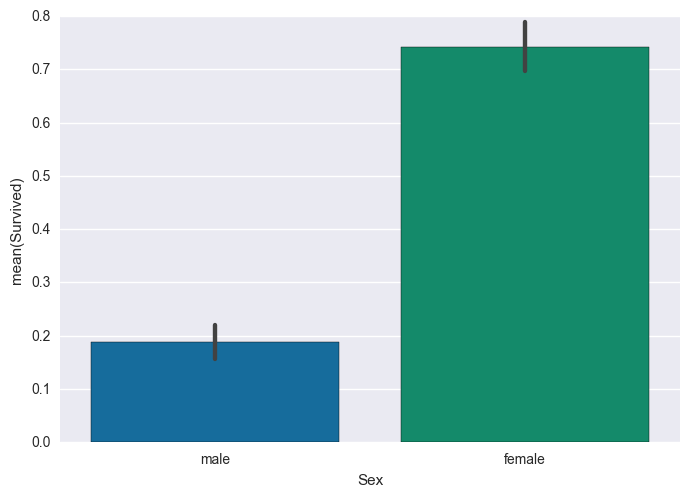

In [238]:
sns.set(style="darkgrid")
sns.barplot(data=titanic_df, x='Sex',y='Survived',palette="colorblind")
sns.plt.show()

<b>Summary of plots: </b>
It is evident from looking at the bar charts that being a women significantly increased your chances of survival on the titanic. 

<h3>2.3.2 What relevance does Age have in increasing chance of surviving?</h3>

In [239]:
titanic_df.Age.mean()

29.69911764705882

In [240]:
titanic_df.Age.median()

28.0

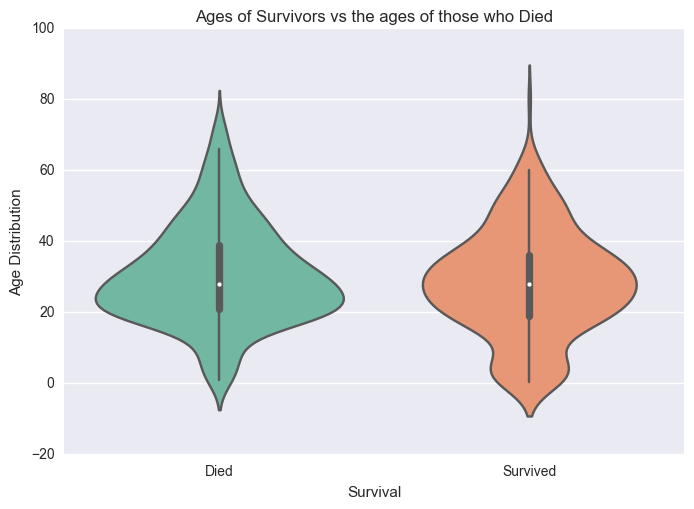

In [241]:
violin_age = sns.violinplot(data = titanic_df, x = 'Survived', y = 'Age',  palette="Set2")


violin_age.set(
                title = 'Ages of Survivors vs the ages of those who Died',
                xticklabels = ['Died','Survived'],
                xlabel = 'Survival',
                ylabel = 'Age Distribution'
            
              );


In [242]:
# Check the outlier for survived
titanic_df[(titanic_df.Survived ==1) & (titanic_df.Age >65)]

,PassengerId,Name,Survived,Pclass,Sex,Age,Fare,Embarked
630,631,"Barkworth, Mr. Algernon Henry Wilson",1,1,male,80.0,30.0,S


<b>Findings:</b>
<p>
By using the Violin Plot we are able to see distribution Age for Died and Survived side by side. From looking at these plots we can see that: </p>
<ul>
<li>The distribution of Age is normal in that the median Age of 28 and mean Age of 29.6 is very similar</li>
<li>The distribution of the Age-Survived is Bi-Modal by the fact that it has two peaks one around 5yrs old and another around 29</li>
<li>Most old people died, however it appears only 1 person >65 years old survived</li>
<li>The ratio of children Aged 0 to 12 that survived is significantly greater than those who didnt</li>
</ul>

So far this Age Survival analysis in combination with the Gender Survival (see section 2.3.2) is supporting the belief that women and children did stand a greater chance of survival

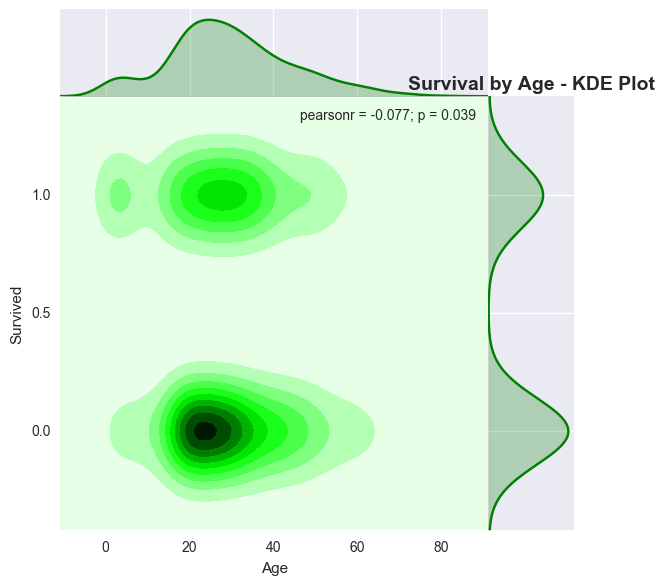

In [243]:
sns.jointplot("Age", "Survived", data=titanic_df,
                   kind="kde", space=0, color="g")
plt.legend()
plt.title('Survival by Age - KDE Plot', fontsize=14, fontweight='bold')
sns.plt.show()

<b>Joint Plot Finding: </b>
The significantly darker shades in the joint plot above indicate that if you were aged between 20-30years old
you had a greater chance of Not Surviving. 

<h3>2.3.3 What relevance does Fare Price have in increasing chance of surviving?</h3>

TypeError: 'str' object is not callable

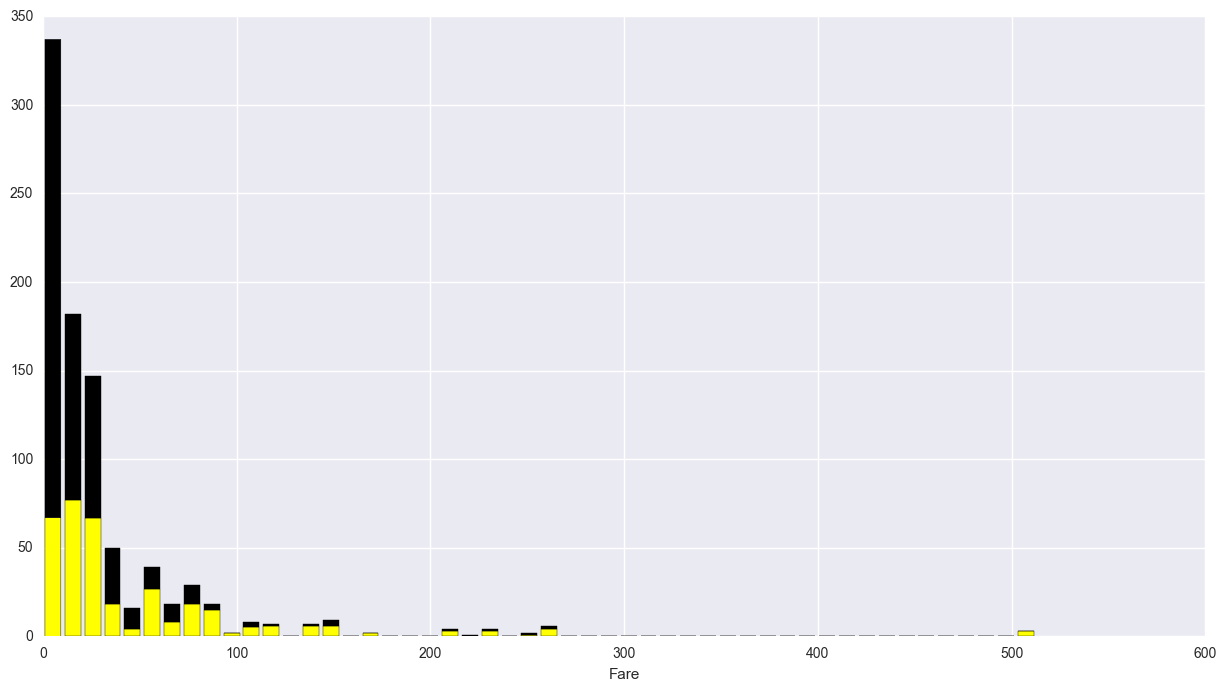

In [244]:
figure = plt.figure(figsize=(15,8))  #15 grids
plt.hist([titanic_df[titanic_df['Survived']==1]['Fare'],
          titanic_df[titanic_df['Survived']==0]['Fare']], 
         stacked=True, 
         color = ['yellow','black'],
         bins = 50,
         label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of Passengers')
plt.legend()
plt.title('Survival by Fare Price', fontsize=14, fontweight='bold')
plt.text(200, 300,'Greater chances of surviving: \n*  As ticket price increases', fontsize=14, color='red')

<b>Summary of Findings:</b>
By looking at the ratio of yellow to black in the stacked bars it appears that as the passengers ticket price increased so did they chances of survival

<b>Interesting Finding: </b>
The ticket price between 40-50 is an exception to the above statement

<h4>Combine Age & Ticket price data to create a Scatter Plot</h4>
Because a child ticket price is often much cheaper than an adults I've made use of a scatter plot to see the relationship of the two variables in context of survival

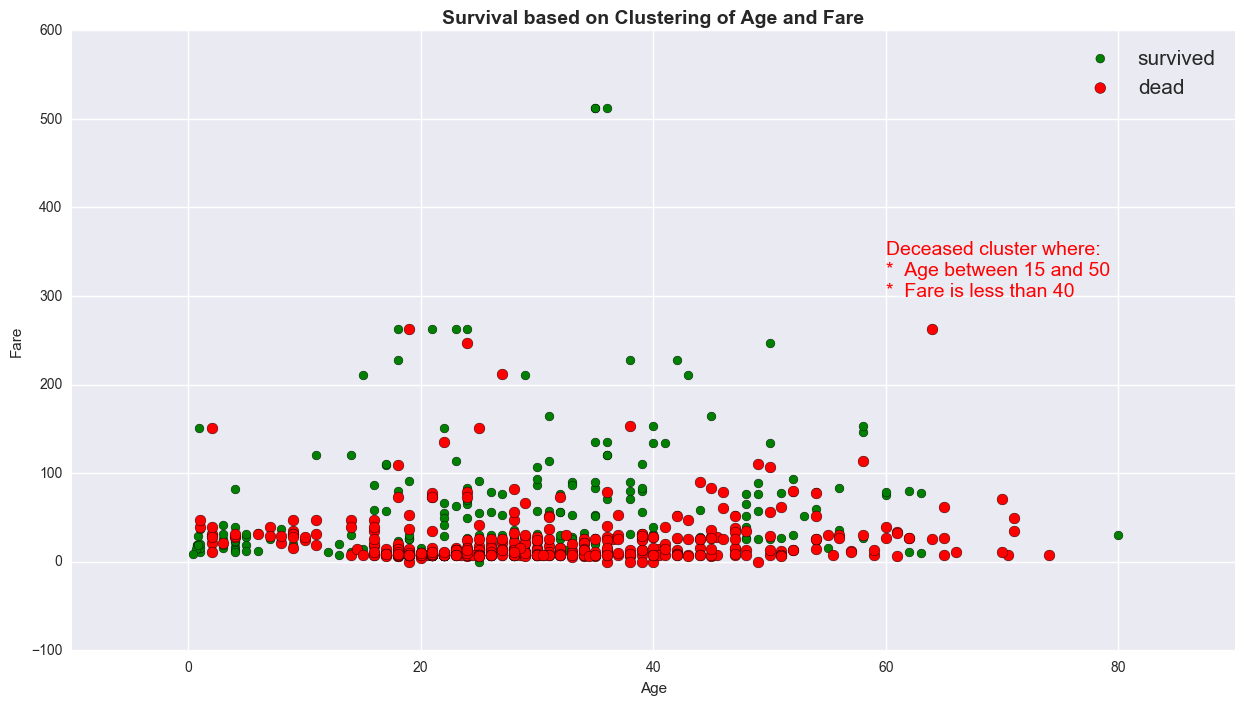

In [258]:
plt.figure(figsize=(15,8))
ax = plt.subplot()

# Plot Survived
ax.scatter(titanic_df[titanic_df['Survived']==1]['Age'],
           titanic_df[titanic_df['Survived']==1]['Fare'],
           c='green',
           s=40)

# Plot Deceased
ax.scatter(titanic_df[titanic_df['Survived']==0]['Age'],
           titanic_df[titanic_df['Survived']==0]['Fare'],
           c='red',
           s=60)

ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.legend(('survived','dead'),
          scatterpoints=1,
          loc='upper right',
          fontsize=15,)

plt.title('Survival based on Clustering of Age and Fare', fontsize=14, fontweight='bold')
plt.text(60, 300,'Deceased cluster where: \n*  Age between 15 and 50 \n*  Fare is less than 40', fontsize=14, color='red')

<b>Summary of Findings:</b>
Fare price only appears to be relevant for those aged >=15

<H3>2.3.4 What relevance does Passenger class have in increasing chance of surviving?</h3>

TypeError: 'str' object is not callable

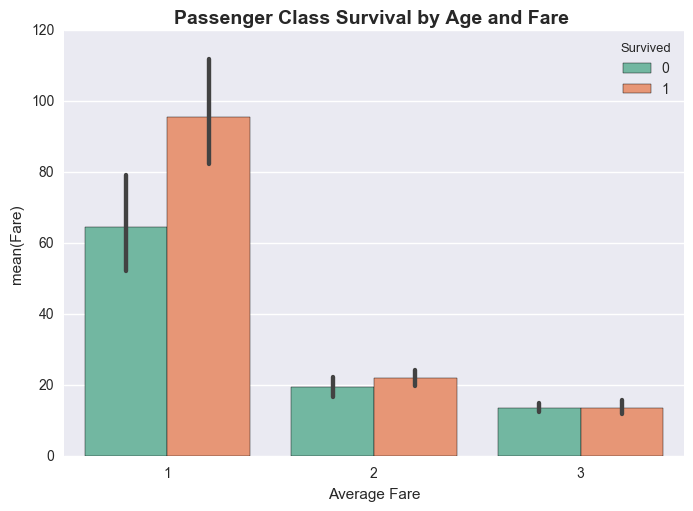

In [260]:
sns.set(style="darkgrid")
sns.barplot( x="Pclass", y='Fare', hue='Survived', data=titanic_df, estimator=np.mean, palette="Set2" )
plt.title('Passenger Class Survival by Age and Fare ', fontsize=14, fontweight='bold')
plt.xlabel('Average Fare')
plt.ylabel('Passengers Class')
sns.plt.show()

<b>Summary of Findings: </b>
Fare price didnt seem to have a significant relevance for Second and Third Class passengers. However, it did appear significant for 1st Class Passengers. It would be interesting to understand whether the more expensive cabins where located closer to the lifeboats; however the data needed to answer this is absent from the data set.

<h3>2.3.5 So How do things look when Survival Rate for Age and Sex is Grouped by Passenger Class? </h3>

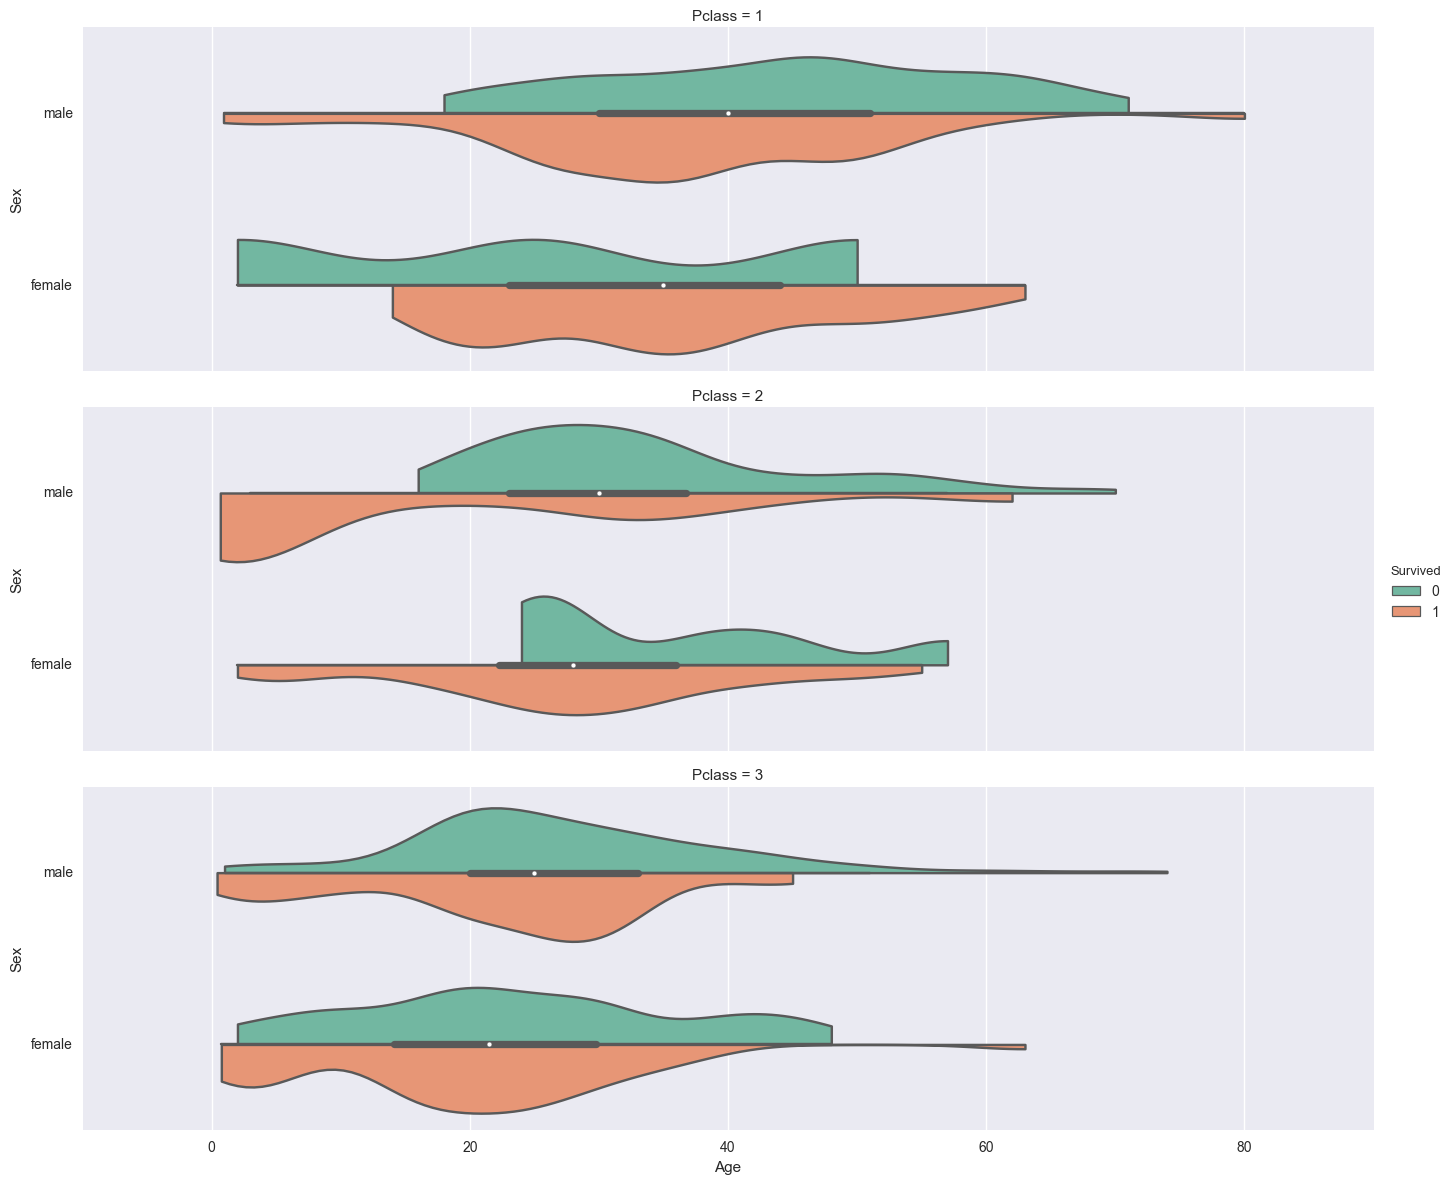

In [261]:

plot1 = sns.factorplot('Age','Sex', hue = 'Survived',row = 'Pclass',  data = titanic_df, 
                         aspect=3.5, palette="Set2", kind="violin", split=True, cut=0, bw=.3)
(plot1.set_axis_labels("Age", "Sex")

) 

<b>Findings:</b>

The use of the violin plot of Sex and Age Survival by sepearate Passenger Classes  show 

<ul>
<li>Each plot shows a very different pattern</li>
<li>Irrespective of Gender and Passenger Class children survived</li>
<li>Irrespective of Gender and Class children survived</li>
<li>Women stood a greater chance of surviving than men across all 3 Passenger Classes</li>
</ul>

<h3>2.3.6 What is the relevance of Embarkment to Age and Survival? </h3>

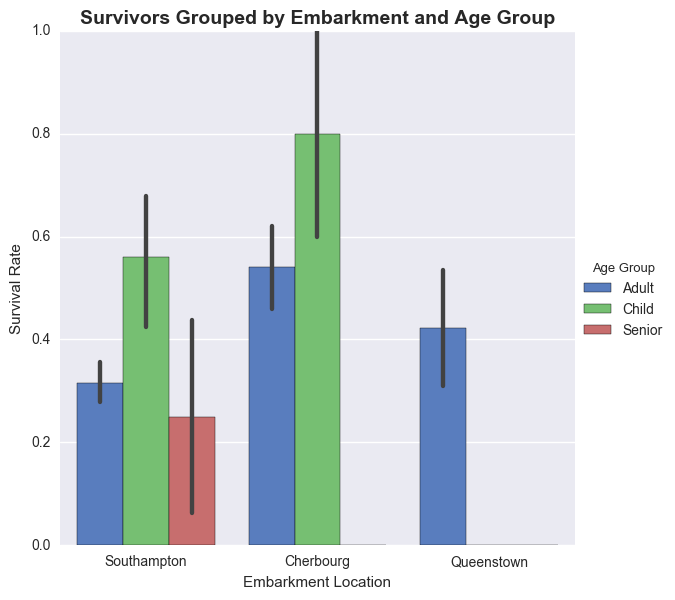

In [262]:
def embarkment_name(Embarked):
    if Embarked == 'S':
        return 'Southampton'
    if Embarked == 'C':
        return 'Cherbourg'
    if Embarked == 'Q':
        return 'Queenstown'
    
def age_group(Age):
    if Age < 15:
        return 'Child'
    elif Age > 60:
        return 'Senior'
    else:
        return 'Adult'

titanic_df['embarkment_loc'] = titanic_df['Embarked'].apply(embarkment_name)    
titanic_df['Age Group'] = titanic_df['Age'].apply(age_group)
plot = sns.factorplot('embarkment_loc', 'Survived', hue = 'Age Group', data = titanic_df, size=6, kind="bar", palette="muted")
plot.set_axis_labels("Embarkment Location", "Survival Rate") 
plt.title('Survivors Grouped by Embarkment and Age Group', fontsize=14, fontweight='bold')

In [314]:
# Check if anyone aged under 15 embarked from Queenstown
titanic_df[(titanic_df.Age <15)& (titanic_df.Embarked=='Q')]

,PassengerId,Name,Survived,Pclass,Sex,Age,Fare,Embarked,embarkment_loc,Age Group
16,17,"Rice, Master. Eugene",0,3,male,2.0,29.125,Q,Queenstown,Child
171,172,"Rice, Master. Arthur",0,3,male,4.0,29.125,Q,Queenstown,Child
278,279,"Rice, Master. Eric",0,3,male,7.0,29.125,Q,Queenstown,Child
787,788,"Rice, Master. George Hugh",0,3,male,8.0,29.125,Q,Queenstown,Child


In [319]:
# Check if anyone aged over 60 embarked from Queenstown or Cherburg
titanic_df[(titanic_df.Age >60)& ((titanic_df.Embarked=='Q')|(titanic_df.Embarked=='C'))]

,PassengerId,Name,Survived,Pclass,Sex,Age,Fare,Embarked,embarkment_loc,Age Group
54,55,"Ostby, Mr. Engelhart Cornelius",0,1,male,65.0,61.9792,C,Cherbourg,Senior
96,97,"Goldschmidt, Mr. George B",0,1,male,71.0,34.6542,C,Cherbourg,Senior
116,117,"Connors, Mr. Patrick",0,3,male,70.5,7.7500,Q,Queenstown,Senior
280,281,"Duane, Mr. Frank",0,3,male,65.0,7.7500,Q,Queenstown,Senior
493,494,"Artagaveytia, Mr. Ramon",0,1,male,71.0,49.5042,C,Cherbourg,Senior


<b>Findings:</b>
<li>No children under 15 years of age who embarked in Queenstown Survived</li>
<li>Only Seniors who embarked in Embarked from Southampton Survived</li>


<h2>3.0 Tentative Conclusion</h2>
<p>All of the following appear to have a significant correlation in determining the chance of survival</p>
<ul>
<li>Gender: Female</li>
<li>Age: less than 15 </li>
<li>Fare Price: > 60 </li>
<li>Passenger Class: 1 </li>
</ul>
<p>To validate further statistical analysis will be required to validate the accuracy of this finding made through visual analysis. </p>

<H2>4.0 Limitations of the Analysis</H2>
<ul>
<li>Correlation does not imply causation. The above conclusion are based on a sample data set. To get real causation would requre a controlled experiment </li>
<li>There is no mention of crew in the data set; unless they are hidden in the 1st, 2nd or 3rd Class data and if they were it may be distorting the results</li>
<li>My handling of the missing age values by subsituting them with the median caused the median Age group to be misrepresented. The Bar chart below gives a comparison between dropping the missing Age values and the substituted age values </li>
<li>The Sibilings and partner values in the data set were not used in my analysis because of the following description that was found in the data discription <i>With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.</i> Using these values may have led me to incorrectly conclude that having family relations would impact your chances of survival. 

</li>
</ul>

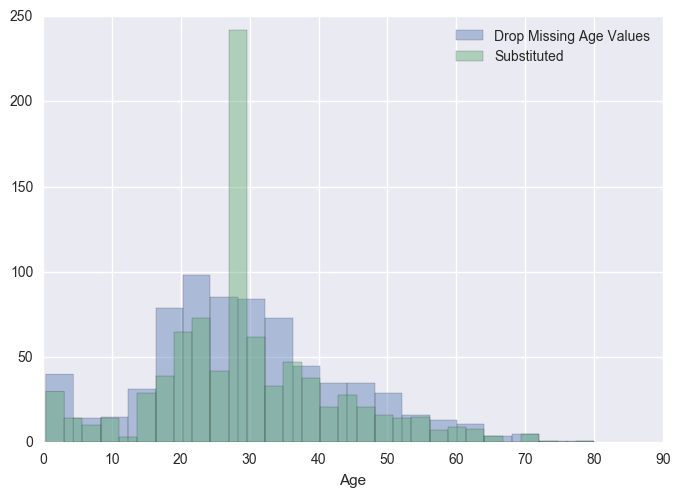

In [170]:
titanic_skew_df2 = pd.read_csv('titanic_data.csv')
sns.distplot(titanic_skew_df2.Age.dropna(), kde=False, label='Drop Missing Age Values')
sns.distplot(titanic_skew_df2['Age'].fillna(titanic_skew_df2['Age'].median()), kde=False, label='Substituted')
plt.legend()

<h2>5.0 References</h2>
<ul>
<li>http://seaborn.pydata.org/</li>
<li>http://stackoverflow.com/questions/22470690/get-list-of-pandas-dataframe-columns-based-on-data-type</li>
<li>http://pandas.pydata.org/pandas-docs/version/0.15.2/tutorials.html</li>
<li>Used for ideas on how to structure analysis http://ahmedbesbes.com/how-to-score-08134-in-titanic-kaggle-challenge.html</li>
<li>http://matplotlib.org/</li>
<li>Video lectures of the course (Intro to Data Analysis)</li>
<li>Kaggle titanic competition page (<a href="https://www.kaggle.com/c/titanic">https://www.kaggle.com/c/titanic</a>)
<li>Use of Seaborn Factorplot http://seaborn.pydata.org/generated/seaborn.factorplot.html?highlight=factorplot </li>
<li>Use of Seaborn Barplot http://seaborn.pydata.org/generated/seaborn.barplot.html?highlight=barplot#seaborn.barplot 
<li>Use of Seaborn Jointplot http://seaborn.pydata.org/generated/seaborn.jointplot.html?highlight=jointplot#seaborn.jointplot </li> 
<li>Seaborn Colour Palettes http://seaborn.pydata.org/tutorial/color_palettes.html?highlight=color%20palette
</li> 
</li>
</ul>
